In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

Part 0: Some Python Tips
==============

**Python lists versus numpy arrays**

In [3]:
t1 = list(range(10000)) # This is a python list. I.e. a list of pointers with a
                        # lot of convenience functions around it. Very comfortable
                        # and usually suffiently performant for everything but
                        # high performance computing.
t2 = np.arange(10000) # This is a numpy array, i.e. a wrapper around a c-array. Because
                      # of this very fast and suited for high performance computing and
                      # interfacing with C and fortran libraries like BLAS.

**`%timeit`** is a special command of the Jupyter Notebook to measure the execution time of a command. We can use it to measure how long it takes to sum over all elements of a python list and a numpy array

In [4]:
%timeit np.sum(t1) # Sum over the python list

1000 loops, best of 3: 718 µs per loop


In [5]:
%timeit np.sum(t2) # Sum over the numpy list: Should be much faster

The slowest run took 13.08 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 13.3 µs per loop


Vectors in numpy are by default 1-dimensional, not 2-dimensional as in Matlab. Therefore, there is no distinction between row and column vectors, unless you extend them to two dimensions

In [6]:
x1 = np.random.randn(4)
y2 = np.random.randn(4)

In [7]:
# The dot product in numpy contracts over the last axis of the first tensor
# and the second-to-last axis of the second tensor, which gives usually
# the desired behaviour.
# The dot product of two vectors is a scalar
x1.dot(y2)

-2.4715305657877762

In [8]:
# To calculate the outer product of two vectors, use np.outer or broadcasting.
np.outer(x1, y2)

array([[ -4.20836101e-01,   1.10944176e+00,   5.96996507e-01,
          2.13153032e-01],
       [  7.38067009e-01,  -1.94575123e+00,  -1.04701908e+00,
         -3.73830146e-01],
       [  3.24978331e-03,  -8.56733847e-03,  -4.61013036e-03,
         -1.64601175e-03],
       [  1.98091441e-01,  -5.22224489e-01,  -2.81011772e-01,
         -1.00333102e-01]])

How to do **subplots**? Either using `plt.subplot` as in matlab or using `plt.subplots`:

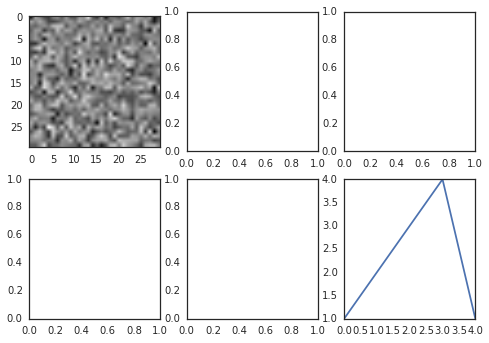

In [9]:
f, axs = plt.subplots(2, 3)
axs[0, 0].imshow(np.random.randn(30,30))
axs[1,2].plot([1,2,3,4,1])

Python has a lot of very helpful **syntax and functions around lists**:

In [10]:
l = list(range(10))

In [11]:
# List comprehensions:
[i**2 for i in l if i % 2 == 0]

[0, 4, 16, 36, 64]

**Generators**: Instead of storing a full list, generators just store how to generate sequential items of a potential list

In [12]:
l = range(5)
print(l) # l is not a list but a range-object
# but l behaves like a list:
for i in l:
    print(i)

range(0, 5)
0
1
2
3
4


Because they don't store the actual list, they can be much more memory efficient than lists. This calculation is O(1) in memory:

In [13]:
l = range(100000000)
sum(l) # Using python's sum function, not numpy's sum function. The python function can work with generators

4999999950000000

In [14]:
# np.sum would convert the generator to a numpy array, allocating a lot of memory
# Better don't try this
#np.sum(l)

You can write your own generators as functions using the `yield` keyword:

In [15]:
def my_func(input_list):
    for i in input_list:
        yield complicated_function_of(i)

You also can write generators like list comprehensions, but with parantheses:

In [16]:
l = range(10)
l_squared = (x**2 for x in l)

With `np.fromiter`, you can convert generators into numpy arrays

In [17]:
np_l = np.fromiter(l_squared, np.float)
np_l

array([  0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81.])

Python comes with some really helpful tools for working with lists. You should next to never have to work with actual indices in python:

In [18]:
list_a = range(10)
list_b = range(10,20)

`zip` iterates over two lists at the same time:

In [19]:
[a+b for a,b in zip(list_a, list_b)]

[10, 12, 14, 16, 18, 20, 22, 24, 26, 28]

`enumerate` returns list items together with their indices (first the index, then the item), saving you from manually incrementing count variables:

In [20]:
for i, letter in enumerate('hello world'):
    print("The letter number", i, 'is', letter)

The letter number 0 is h
The letter number 1 is e
The letter number 2 is l
The letter number 3 is l
The letter number 4 is o
The letter number 5 is  
The letter number 6 is w
The letter number 7 is o
The letter number 8 is r
The letter number 9 is l
The letter number 10 is d


Python has a lot of really convenient **string handling** functions. One of the most important is `format`, which works roughly like `printf`:

In [21]:
for i, letter in enumerate('hello world'):
    print("The letter number {nr:.02f} is {name}".format(nr=i, name=letter))

The letter number 0.00 is h
The letter number 1.00 is e
The letter number 2.00 is l
The letter number 3.00 is l
The letter number 4.00 is o
The letter number 5.00 is  
The letter number 6.00 is w
The letter number 7.00 is o
The letter number 8.00 is r
The letter number 9.00 is l
The letter number 10.00 is d


You should look into `split`, `join` and the `re`-module for more advanced string processing in python.

**lambda functions** are oneline anonymous functions.

In [22]:
my_func = lambda x: x**2
my_func(10)

100

One of the really cool features in python is the support of **keyword arguments**. Keyword arguments provide both a nice looking syntax for setting default values as well for handing arguments to the function:

In [23]:
def foo(x, a=1, b=False):
    """This function has two optional arguments"""
    print("x = {}, a={}, b={}".format(x, a, b))

# We don't have to provide values for a and b
foo(10)

x = 10, a=1, b=False


In [24]:
# But we can (as in C++)
foo(10, 11)
foo(10, 11, 23)

x = 10, a=11, b=False
x = 10, a=11, b=23


In [25]:
# If we want to use only the later arguments, we can hand them using the keyword syntax.
# This also makes the code more readable for other people
# (compare plot(x,y,3) to plot(x,y, linewidth=3)
foo(10, b=42)
foo(10, b=23, a='bar')

# We can even set positional arguments using the keyword syntax
foo(x=1, a=2, b=3)

x = 10, a=1, b=42
x = 10, a=bar, b=23
x = 1, a=2, b=3


Even lamdas support keyword arguments

In [26]:
foo_lambda = lambda x, y=42: x+y

In [27]:
foo_lambda(0)

42

In [28]:
foo_lambda(0, y=0)

0

In matlab, you can write statemens like `[U, V, D] = svd(M)`. In python, this kind of expression is called **unpacking** and works without brackets and in a more general way than in matlab: You can unpack every tuple into variables, which makes exchanging variable content especially simple:

In [29]:
a = 1
b = 2

b, a = a, b

Python has a **ternary operator** (like `cond ? x1 : x2` in c++, php etc.):

In [30]:
cond = False

x = "yes" if cond else "no"
# equivalent to:
if cond:
    x = "yes"
else:
    x = "no"

**Fancy indexing in numpy**: Using lists of indices, you can access arbitrary lists of elements in numpy arrays:

In [31]:
x = np.random.randn(4, 4)
x

array([[ 1.05993443,  1.42028429,  1.15315775, -0.84478934],
       [ 0.46731363,  1.40297954, -1.54948639,  0.02045787],
       [ 0.33035924, -1.09866195,  1.4020076 ,  0.34436571],
       [-0.42948691,  0.44853017,  0.01352166,  0.43886972]])

In [32]:
x[[0,1], [2,3]]

array([ 1.15315775,  0.02045787])

Python has a sophisticated **exception handling system**:

In [33]:
try:   
    [1,2][4]
    1/0
except ZeroDivisionError:
    print("Exception happened")
except IndexError:
    print("Index")
print("Done")

Index
Done


In python, **functions are first order objects**. This means that is totally fine for a function to return another function. Also, **closures** are supported, i.e. returning functions that make use of variabes from the outer function:

In [34]:
def foo(f):
    def inner_f():
        print("called")
        f()
    return inner_f

In [35]:
def test():
    print("Hi")

test()

Hi


In [36]:
foo(test)()

called
Hi


As wrapping functions is very useful in a lot of contexts, python provides syntactic sugar for this in form of **decorators**:

In [37]:
# equivalent to test2 = foo(test2)
@foo
def test2():
    print("hi again")

In [38]:
test2()

called
hi again


Part1: Generating Data
=============

In [39]:
def logistic_p(xs, beta0, beta1):
    """calculate probabilities p(y=1|x) for beta0 and beta1
    """
    p_y_data = 1/(1+np.exp(beta0+beta1*xs))
    return p_y_data

def logistic_samples(xs, beta0, beta1):
    """sample from p(y|x)"""
    p_y_data = logistic_p(xs, beta0, beta1)
    y_data = np.random.uniform(size=len(xs)) < p_y_data
    y_data = y_data.astype(np.float)
    return y_data

In [40]:
x_data = np.random.uniform(size=1000)
y_data = logistic_samples(x_data, 4.6, -5.9)

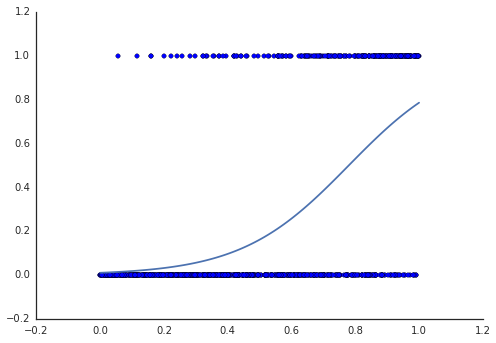

In [41]:
plt.scatter(x_data, y_data)
xs = np.linspace(0,1, num=100)
ys = logistic_p(xs, 4.6, -5.9)
plt.plot(xs, ys)
sns.despine()

Part 2: Solving for the logistic curve
======================

In [42]:
from scipy.optimize import minimize

We are using `scipy.optimize.minimize` to find the maximum likelihood parameters. This is a simple interface
to a lot of different optimization methods included in scipy, including newton methods, BFGS, and global optimization methods.

We are using one function to calculate the loss and the gradient at the same time. `minimize` can also handle
two different functions for this purpose or use finite difference to approximate the gradient on it's own

In [43]:
def cost_and_gradient(xs, ys, beta0, beta1):
    exponential = np.exp(beta0+beta1*xs)
    numerator = 1 + np.exp(beta0+beta1*xs)
    p_1 = 1 / numerator # p(y=1 | x)
    p_0 = 1-p_1 # p(y=0 | x)

    cost = -(ys*np.log(p_1) + (1-ys)*np.log(p_0)).mean()
    
    d_cost_beta0 = -(p_1 - ys).mean()
    d_cost_beta1 = -((p_1 - ys)*xs).mean()
    
    return cost, np.array([d_cost_beta0, d_cost_beta1])

# minimize needs the function to take the parameters as first argument, therefore we need a wrapper
# around `cost_and_gradient`
def f(theta, xs, ys):
    # print(theta)
    return cost_and_gradient(xs, ys, theta[0], theta[1])

In [44]:
# Starting point
theta0 = np.array([0, 0])

# Do the optimization
res = minimize(f, theta0, jac=True, method='BFGS', tol=1e-10, args=(x_data, y_data))

`minimize` returns a Result-object with status information, debugging informtion and the converged result

In [45]:
print(res)

     njev: 18
  success: True
   status: 0
 hess_inv: array([[  86.49592635, -114.69638558],
       [-114.69638558,  167.55839596]])
        x: array([ 4.66480601, -5.93004638])
  message: 'Optimization terminated successfully.'
      fun: 0.38830980341237603
     nfev: 18
      jac: array([  9.19400449e-11,   7.77594789e-11])


In [46]:
# the termination point is an attribute of the result-object:
res.x

array([ 4.66480601, -5.93004638])

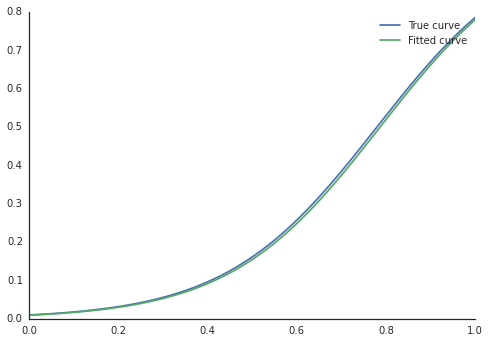

In [47]:
xs = np.linspace(0, 1,  num=100)
p_true = logistic_p(xs, 4.6, -5.9)
p_fit = logistic_p(xs, res.x[0], res.x[1])

plt.plot(xs, p_true, label="True curve")
plt.plot(xs, p_fit, label="Fitted curve")
plt.legend()
sns.despine()


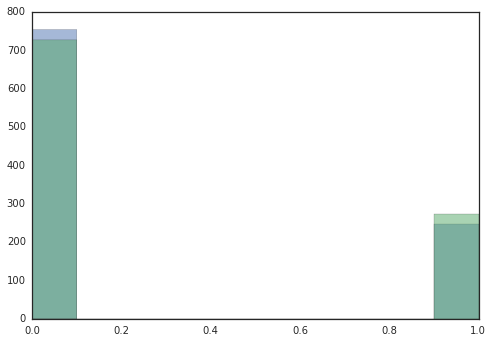

In [48]:
samples_from_fit_xs = np.random.uniform(size=1000)
samples_from_fit_ys = logistic_samples(samples_from_fit_xs, res.x[0], res.x[1])

samples_from_true_xs = np.random.uniform(size=1000)
samples_from_true_ys = logistic_samples(samples_from_true_xs, 4.6, -5.9)
plt.hist(samples_from_fit_ys, alpha=0.5)
plt.hist(samples_from_true_ys, alpha=0.5);

Shorter solution: Use scikit learn!
====================

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
clf = LogisticRegression(C=1e10,
                         solver='lbfgs',
                         tol=1e-12,
                         verbose=1,
                         max_iter=1000,
                         multi_class='multinomial',
                        ) # Next to no l2-regularization!

clf.fit(x_data[:, np.newaxis], y_data)
clf.coef_, clf.intercept_

(array([[ 2.96503034]]), array([-2.33240395]))

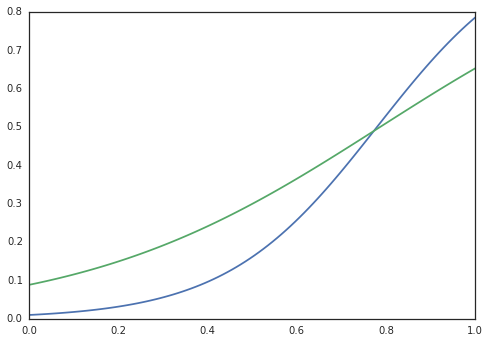

In [51]:
plt.plot(xs, p_true)
plt.plot(xs, clf.predict_proba(xs[:, np.newaxis])[:, 1])

For some reason, scikit learn does not converge to the same result.

Shorter Solution 2: Use Theano!
==================

In [52]:
# TODO

Day 2
====

In [53]:
xs = np.random.randn(100, 2)

Suppose `xs` is a list of $N$ 2d-positions. We want to calculate a Gaussian process kernel matrix for these positions. To do so, we need all pairwise distances over these $N$ positions. Here, [numpy's broadcasting rules come in handy](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)

In [54]:
xs.shape

(100, 2)

Using `np.newaxis`, we can insert new dimensions of size 1 into the shape of `xs`:

In [55]:
xs[np.newaxis, :, :].shape

(1, 100, 2)

In [56]:
xs[:, np.newaxis, :].shape

(100, 1, 2)

For numpy, dimensions of size 1 are compatible with every other size in pointwise operations. They are just blown up to the size of the other operand. Therefore we can substract the previous two arrays, getting a $N \times N \times 2$ tensor of pairwise differences in $x_1$ and $x_2$:

In [57]:
(xs[np.newaxis, :, :] - xs[:, np.newaxis, :]).shape

(100, 100, 2)

Finally, by squaring and summing over the last axis, we get the $N\times N$-matrix of pairwise squared euclidean distances:

In [58]:
np.square(xs[np.newaxis, :, :] - xs[:, np.newaxis, :]).sum(axis=-1).shape

(100, 100)

Now to the actual exercise...

In [59]:
# x = N x n_dim
def kernel(xs, rho, l):
    distances = np.square(xs[:, np.newaxis, :] - xs[np.newaxis, :, :]).sum(axis=-1)
    K = rho * np.exp(-(distances)/2/l**2)
    return K

In [60]:
xs = np.linspace(0,1, num=20)
ys = np.linspace(0,1, num=20)
XS, YS = np.meshgrid(xs, ys)
xs = np.vstack([XS.flatten(), YS.flatten()]).T
K = kernel(xs, 10, 0.1)

In [61]:
K.shape

(400, 400)

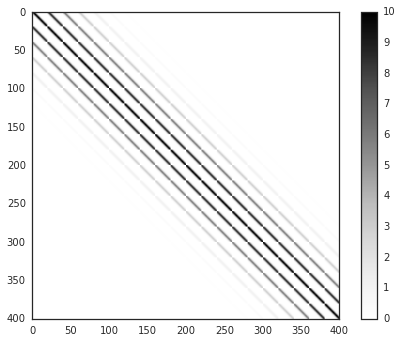

In [62]:
plt.imshow(K)
plt.colorbar()

In [63]:
np.linalg.cond(K)

13723554536876.883

In [64]:
L = np.linalg.cholesky(K)

In [65]:
def sample(xs):
    samples = np.random.multivariate_normal(np.zeros(len(xs)), K)
    #samples = samples.reshape(XS.shape)
    return samples

Sampling from the Kernel, checking sample covariance matrix.

In [66]:
ss = [sample(xs) for i in range(100)]

In [67]:
K_sample = np.cov(np.array(ss).T)

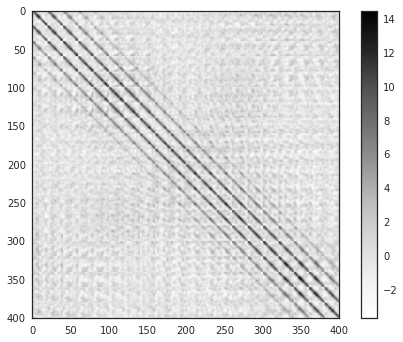

In [68]:
plt.imshow(K_sample)
plt.colorbar()

Plotting some samples from the gaussian process

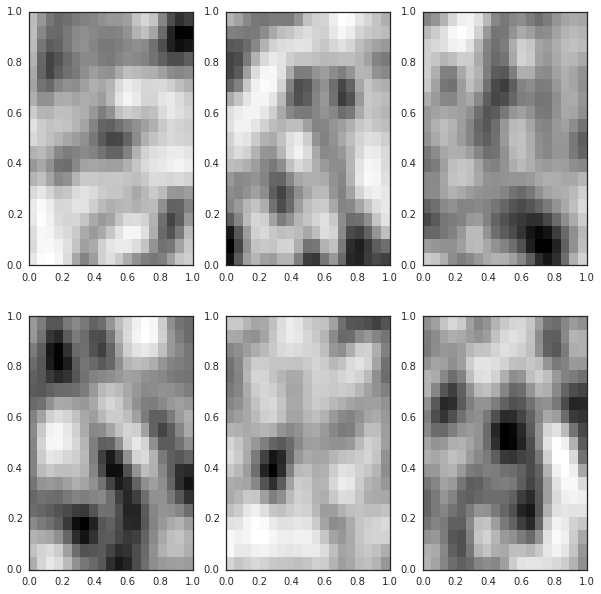

In [69]:
n_col = 3
n_row = 2
f, axes = plt.subplots(n_row, n_col, figsize=(10,10))
for i in range(n_row):
    for j in range(n_col):
        axes[i, j].pcolormesh(XS, YS, sample(xs).reshape(XS.shape))

Inference
==========

In [70]:
n_data = 3
n_infer = 100

In [71]:
x0 = np.random.uniform(0, 2*np.pi, size=n_data)
y0 = np.sin(x0)

In [72]:
xs = np.linspace(0, 2*np.pi, num=n_infer)
ys_true = np.sin(xs)

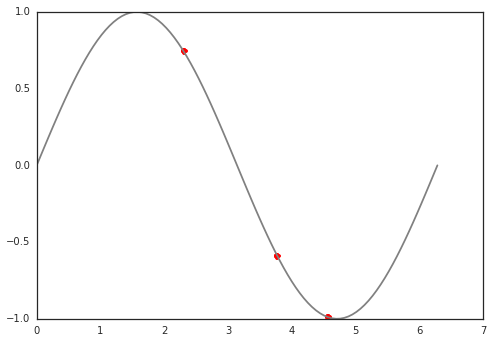

In [73]:
plt.plot(x0, y0, 'ro')
plt.plot(xs, ys_true, color='grey')

In python, indices are zero-based. `a[2:5]` returns `[a[2], a[3], a[4]]`. This is different from matlab but makes cleaner coding in a lot of context. Especially, `+1` and `-1` is usually not necessary:

In [74]:
large_xs = np.hstack([x0, xs])
K = kernel(large_xs[:, np.newaxis], 1, 1)
K0 = K[:n_data, :n_data]
Kstar0 = K[n_data:, :n_data]
Kstar = K[n_data:, n_data:]

In [75]:
mean_posterior = Kstar0.dot(np.linalg.solve(K0, y0))

In [76]:
cov_posterior = Kstar - Kstar0.dot(np.linalg.solve(K0, Kstar0.T))

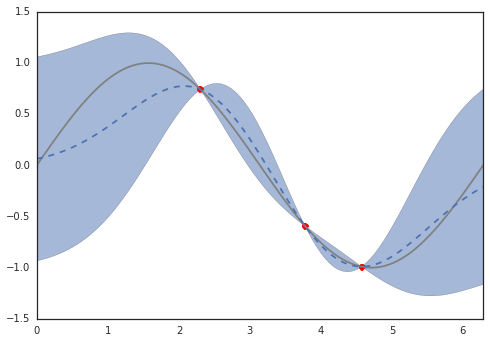

In [77]:
plt.plot(x0, y0, 'ro')
plt.plot(xs, ys_true, color='grey')
plt.plot(xs, mean_posterior, '--')

#for i in range(5):
#    posterior_sample = np.random.multivariate_normal(mean_posterior, cov_posterior)
#    plt.plot(xs, posterior_sample, linewidth=1, color='lightgrey')

    
error = np.sqrt(cov_posterior.diagonal())    

plt.fill_between(xs,
                 mean_posterior - error,
                 mean_posterior + error,
                 alpha=0.5)
plt.xlim(0, 2*np.pi);

IPythons `interact` function provides an simple way to create interactive plots which the possiblity to change parameters (The control widgets are visible only if you execute the cell in your own notebook server):

In [78]:
from IPython.html.widgets import interact

/opt/conda/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


/opt/conda/lib/python3.4/site-packages/ipykernel/__main__.py:18: RuntimeWarning: covariance is not positive-semidefinite.


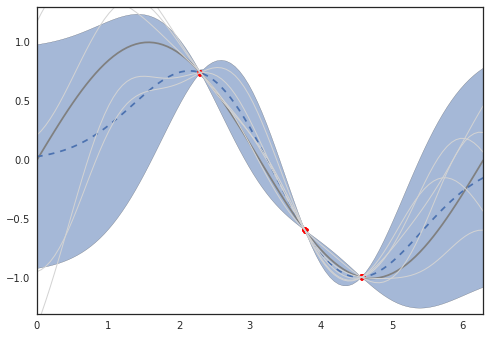

In [79]:
@interact(rho=(0,2,0.1), l=(0,2,0.1))
def example(rho, l):
    large_xs = np.hstack([x0, xs])
    K = kernel(large_xs[:, np.newaxis], rho, l)
    K0 = K[:n_data, :n_data]
    K0star = K[n_data:, :n_data]
    Kstar = K[n_data:, n_data:]
    
    mean_posterior = K0star.dot(np.linalg.solve(K0, y0))
    cov_posterior = Kstar - K0star.dot(np.linalg.solve(K0, K0star.T))
    
    plt.plot(x0, y0, 'ro')
    plt.plot(xs, ys_true, color='grey')
    plt.plot(xs, mean_posterior, '--')
    
    rng = np.random.RandomState(42)
    for i in range(5):
        posterior_sample = rng.multivariate_normal(mean_posterior, cov_posterior)
        plt.plot(xs, posterior_sample, linewidth=1, color='lightgrey')

    error = np.sqrt(cov_posterior.diagonal())
    plt.fill_between(xs,
                     mean_posterior - error,
                     mean_posterior + error,
                     alpha=0.5)
    #plt.title('$\\rho={}$, l={}'.format(rho, l))
    plt.xlim(0, 2*np.pi)
    plt.ylim(-1.3, 1.3)

**Further watching** The python scientific computing community has multiple conferences and usually put all their talks online. This is a nice way to get informed about the recent advances in the community. Of most interest are probably the scipy conference [youtube playlist](https://www.youtube.com/playlist?list=PLYx7XA2nY5Gcpabmu61kKcToLz0FapmHu) and the pydata conferences [youtube cannel](https://www.youtube.com/user/PyDataTV). A great start is Jake van der Plas' Keynote ["State of the tools"](https://www.youtube.com/watch?v=5GlNDD7qbP4) from scipy 2015.

One of the reasons why python is so helpful is that it is a general purpose language: For a lot of different problems there is already a community that provides a library to solve the problem. For a extensive list of python packages solving problems you didn't even knew you had, see https://github.com/vinta/awesome-python